# Tải thư viện

In [351]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

# Tổng quan dữ liệu

## Dữ liệu ban đầu

In [370]:
# Load the dataset
data = pd.read_csv('../data/raw/diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Mô tả dữ liệu

In [353]:
# Loại bỏ cột dữ liệu thừa
data = data.drop(columns=['Unnamed: 0'])

In [354]:
# Mô tả dữ liệu
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [355]:
# Dữ liệu "phi số"
for col in ['cut', 'color', 'clarity']:
    print(f"{col}: {data[col].unique()}")


cut: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [356]:
# Số lượng giá trị duy nhất
data.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

# Phân bố dữ liệu

## Chuẩn bị các đặc trưng

In [357]:
# Danh sách các đặc trưng
features = data.columns.tolist()
features.remove('price')

In [358]:
# Đặc trưng số - Biến liên tục
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Đặc trưng "phi số" - Biến rời rạc
categorical_cols = ['cut', 'color', 'clarity']

## Phân bố giá

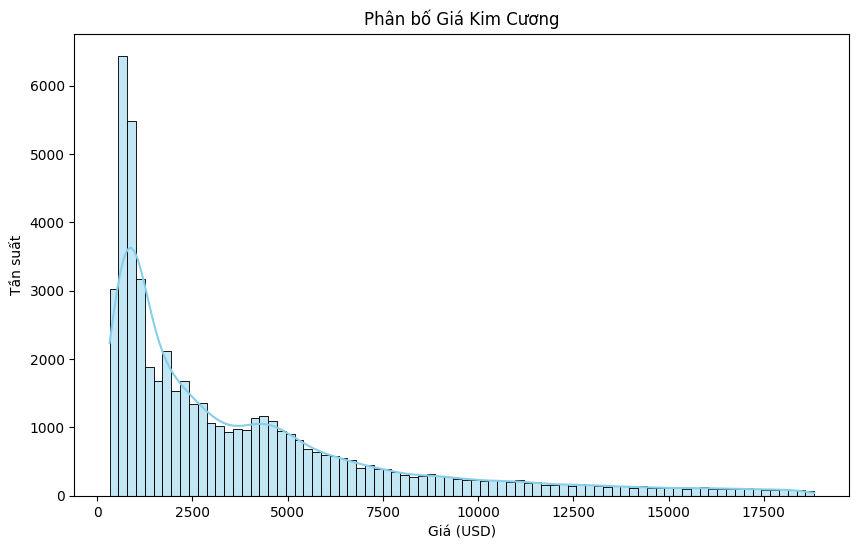

In [359]:
# Sự phân bố về giá
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, color='skyblue', edgecolor='black')
plt.title('Phân bố Giá Kim Cương')
plt.xlabel('Giá (USD)')
plt.ylabel('Tần suất')
plt.show()

## Phân bố các biến

### Biến liên tục

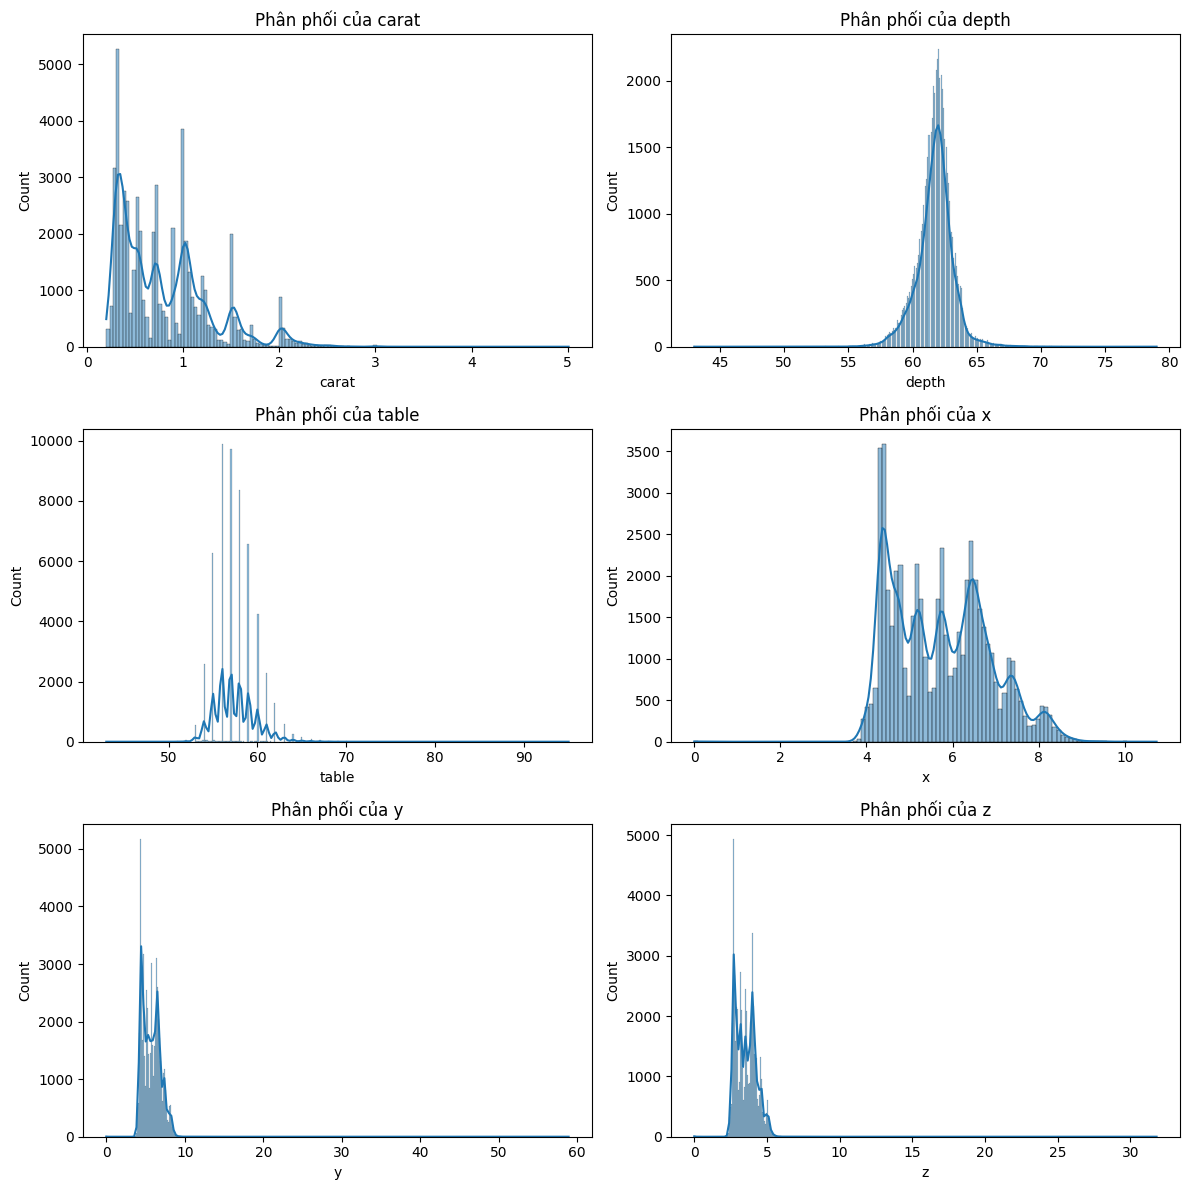

In [360]:
# Sự phân bố của các biến
plt.figure(figsize=(12, 12))
for col in numerical_cols:
    plt.subplot(3, 2, numerical_cols.index(col) + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Phân phối của {col}')
plt.tight_layout()
plt.show()

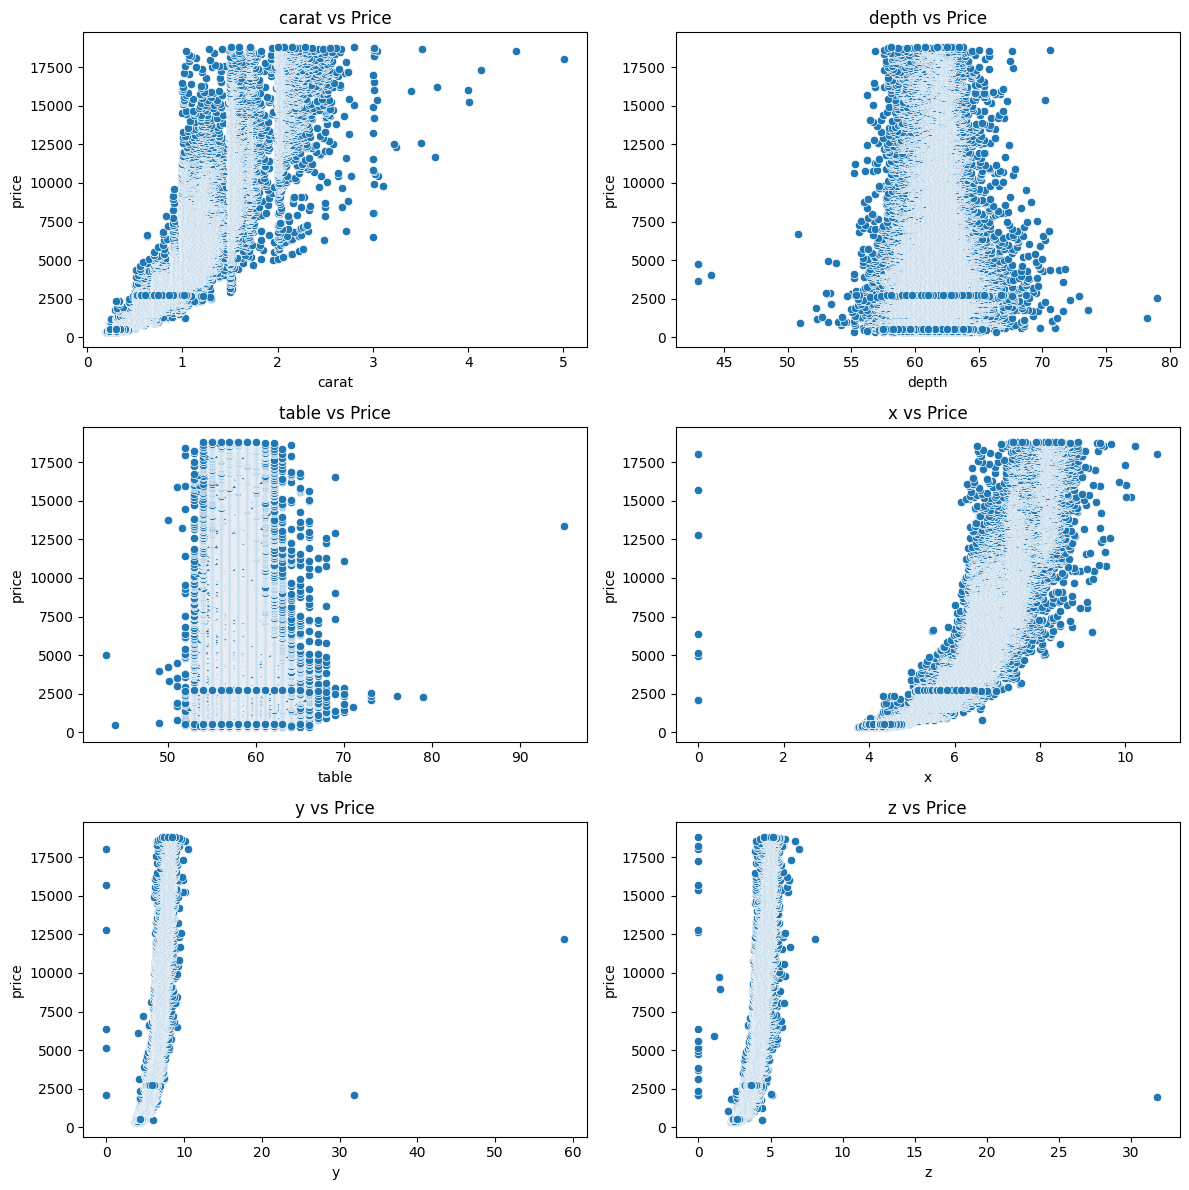

In [361]:
# Sự tương quan giữa các biến
plt.figure(figsize=(12, 12))
for col in numerical_cols:
    plt.subplot(3, 2, numerical_cols.index(col) + 1)
    sns.scatterplot(data=data, x=col, y='price')
    plt.title(f'{col} vs Price')
plt.tight_layout()
plt.show()

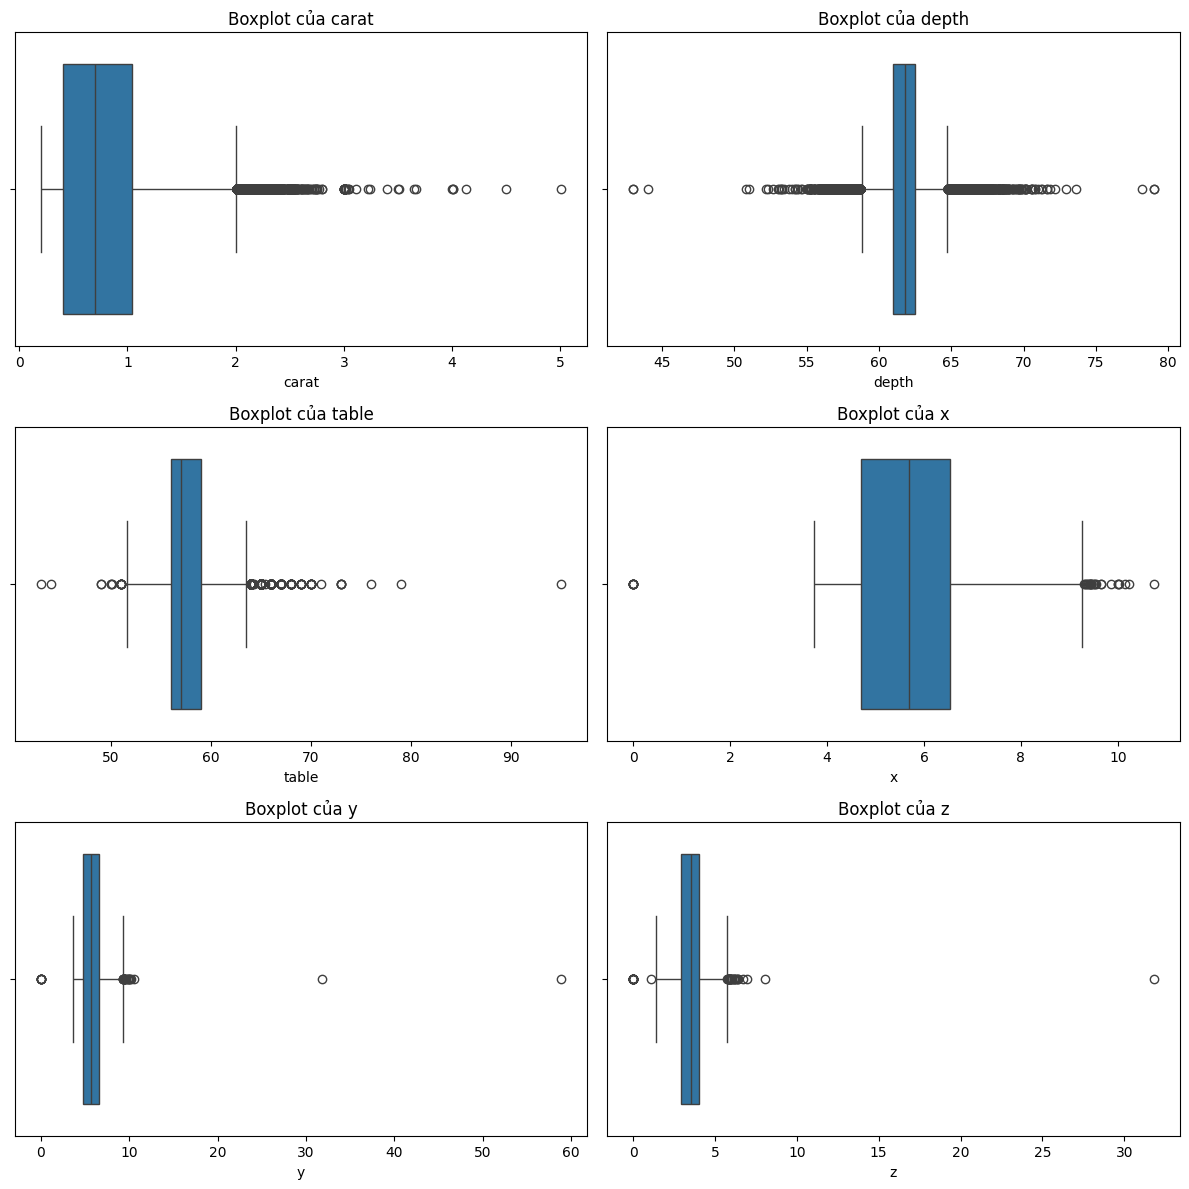

In [362]:
# Biểu đồ hộp
plt.figure(figsize=(12, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot của {col}')
plt.tight_layout()
plt.show()

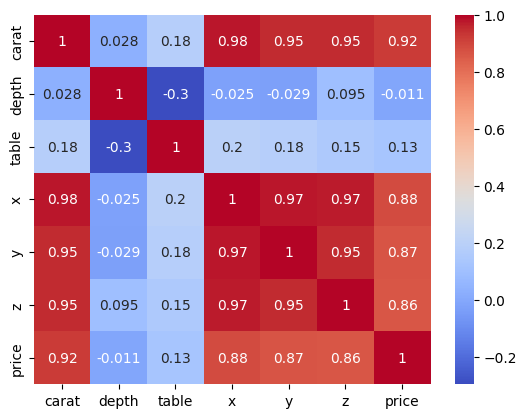

In [363]:
# Ma trận tương quan
corr = data[numerical_cols + ['price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Biến rời rạc

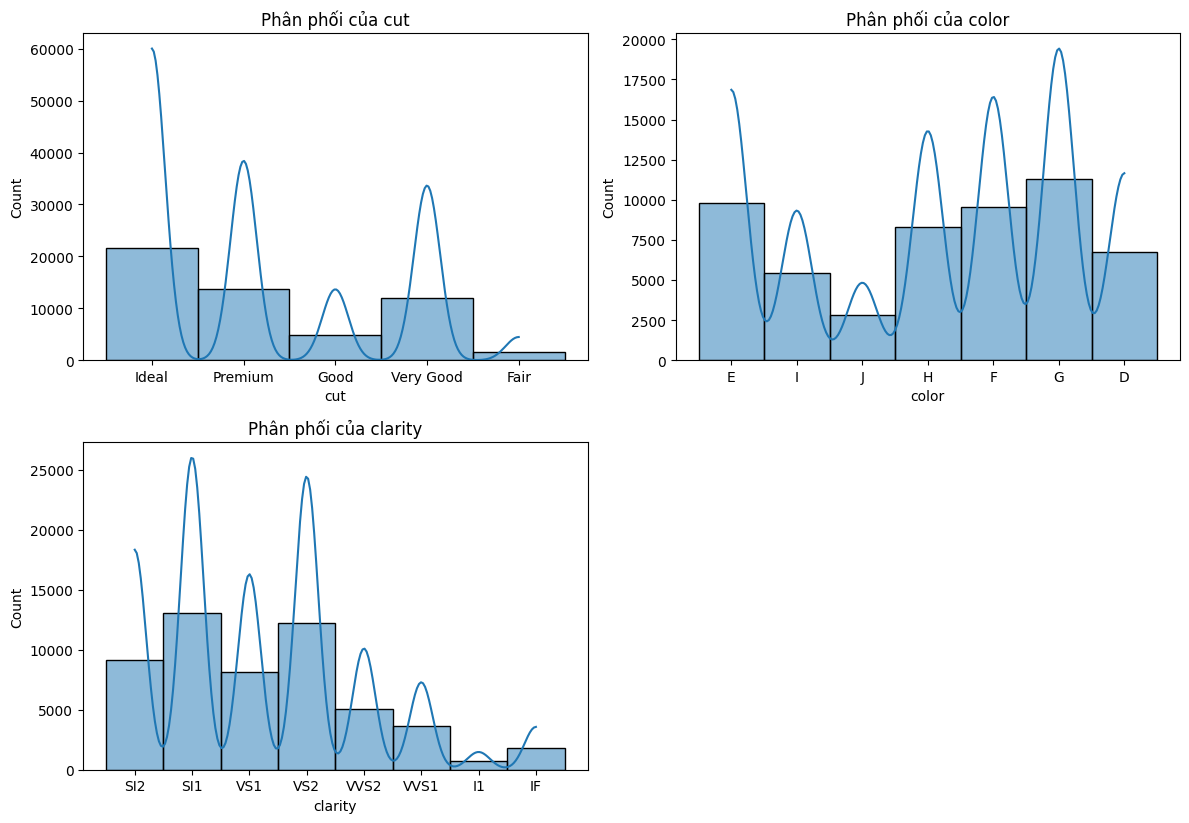

In [ ]:
plt.figure(figsize=(12, 12))
for col in categorical_cols:
    plt.subplot(3, 2, categorical_cols.index(col) + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Phân phối của {col}')
plt.tight_layout()
plt.show()

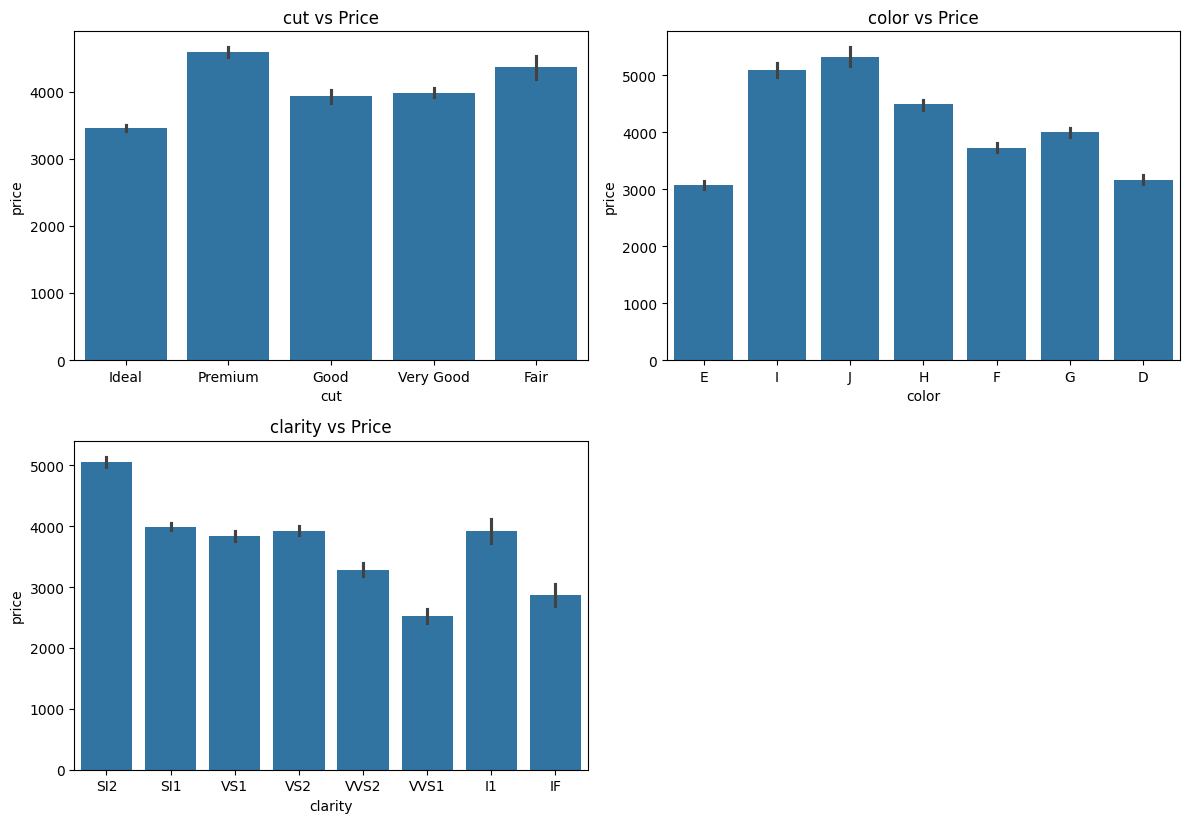

In [ ]:
# Giá trị trung bình của các biến rời rạc theo price
plt.figure(figsize=(12, 12))
for col in categorical_cols:
    plt.subplot(3, 2, categorical_cols.index(col) + 1)
    sns.barplot(data=data, x=col, y='price')
    plt.title(f'{col} vs Price')
plt.tight_layout()
plt.show()

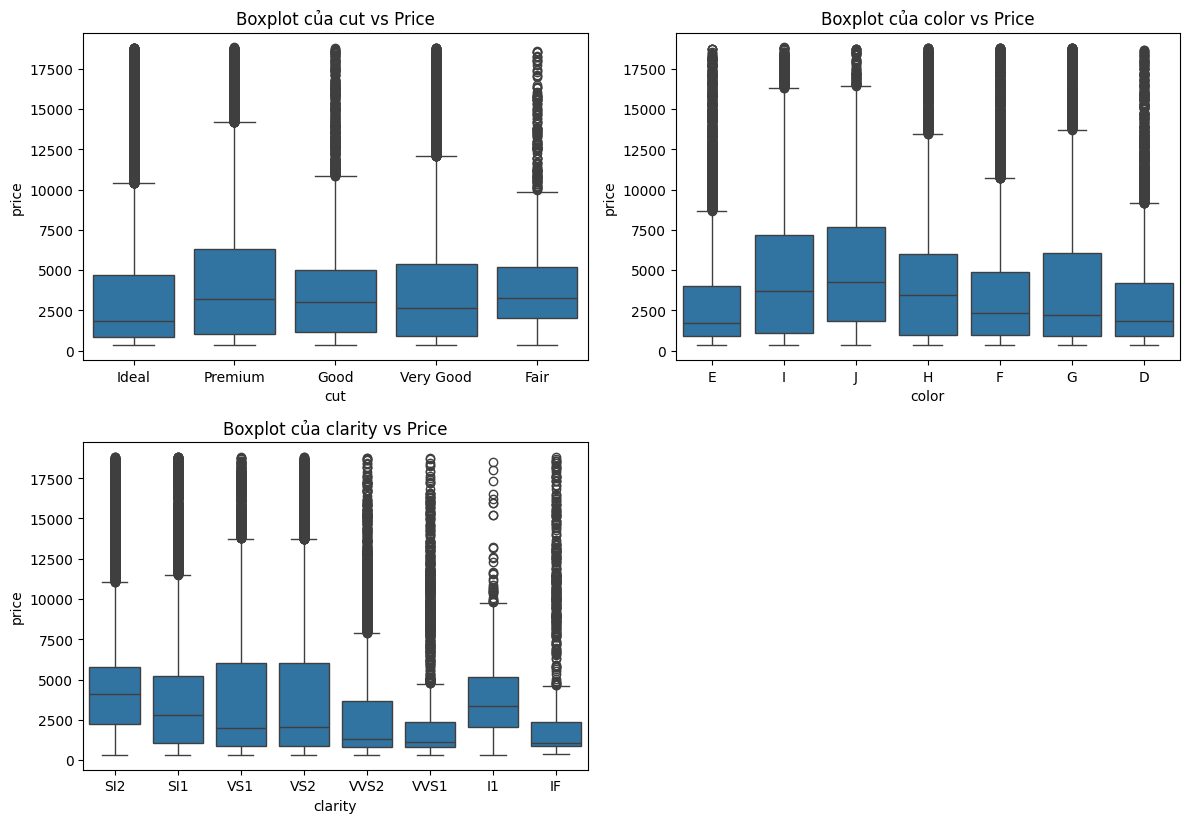

In [ ]:
# Biểu đồ hộp của các biến rời rạc theo price
plt.figure(figsize=(12, 12))
for col in categorical_cols:
    plt.subplot(3, 2, categorical_cols.index(col) + 1)
    sns.boxplot(x=data[col], y=data['price'])
    plt.title(f'Boxplot của {col} vs Price')
plt.tight_layout()
plt.show()